### Barycentric coordinates and shape functions: 
The barycentric coordinates for a general point in a canonical triangle ($\hat{\mathcal{T}}$) can be readily deduced as: $\xi_1 = \xi$, $\xi_2 = \eta$, and $\xi_3 = 1 - \xi - \eta$. Take any point with coordinates $(\xi, \eta)$ and take the ratio of the area of triangle formed by the point and any two vertices of the triangle and the area of the entire canonical element $\hat{\mathcal{T}}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
from sympy import Symbol, symbols, simplify, lambdify, init_printing, diff
from sympy.plotting import plot3d

In [3]:
xi, eta = symbols("xi, eta", real=True)

In [ ]:
N1 = xi
N2= eta
N3 = 1 -xi - eta

In [ ]:
# Linear basis
plot3d(N1, (xi, 0, 1), (eta, 0, 1))
plot3d(N2, (xi, 0, 1), (eta, 0, 1))
plot3d(N3, (xi, 0, 1), (eta, 0, 1))

In [ ]:
# Modified basis
plot3d(-N1 *(1-2*xi-2*eta), (xi,0, 1), (eta, 0, 1))

In [ ]:
p1 = plot3d(-N2 *(1-2*xi-2*eta), (xi,0, 1), (eta, 0, 1))
p1._backend.ax[0].collections[0].set_cmap(cm.jet)

In [3]:
from sympy import solve_linear_system, Matrix, symbols, init_printing, simplify
init_printing()

### Problem 1: constant derivatives

In [4]:
x, y, xi, eta, x1, x2, x3, y1, y2, y3 = symbols("x, y, xi, eta, x1, x2, x3, y1, y2, y3", ral=True)
system = Matrix(((x1 - x3, x2 - x3, x - x3), (y1 - y3, y2 - y3, y - y3)))
soln = solve_linear_system(system, xi, eta)

In [5]:
xi = simplify(xi.subs(soln))

In [6]:
eta = simplify(eta.subs(soln))

In [7]:
N1 = xi
N2 = eta
N3 = 1-xi-eta

In [8]:
N1 *= (2*xi + 2*eta - 1)
N2 *= (2*xi + 2*eta - 1)
N3 *= (1-2*xi - 2*eta)
N4 = (1-xi-eta) * 4*eta
N5 = (1-xi-eta) * 4*xi

In [9]:
x4 = (x3 + x2)/2
x5 = (x1 + x3)/2

y4 = (y3 + y2)/2
y5 = (y1 + y3)/2

simplify(N1*x1 + N2*x2 + N3*x3 + N4*x4 + N5*x5)

In [10]:
simplify(N1*y1 + N2*y2 + N3*y3 + N4*y4 + N5*y5)

In [27]:
from sympy import Array, tensorproduct, flatten, transpose
xi, eta = symbols("xi, eta", real=True)

In [19]:
N2L = lambda x: Array([x*(x-1)/2, (1-x**2), x*(x+1)/2])
shp = tensorproduct(N2L(xi), N2L(eta))

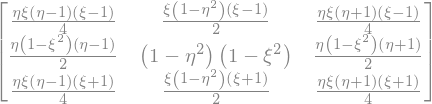

In [20]:
shp

In [30]:
xv = Array([Symbol("x_{}".format(i+1)) for i in range(9)])
yv = Array([Symbol("y_{}".format(i+1)) for i in range(9)])

In [42]:
x = simplify(Matrix(flatten(transpose(shp))).dot(xv))
y = simplify(Matrix(flatten(transpose(shp))).dot(yv))

In [55]:
J = simplify(Matrix([[x.diff(xi), x.diff(eta)], [y.diff(xi), y.diff(eta)]]))

In [56]:
J_00 = simplify(J.det())

In [57]:
J_00 = J_00.subs([(xi, 0), (eta, 0)])

In [60]:
simplify(4*J_00)